In [1]:
# 보스턴 주택가격 데이터에 머신러닝 기반의 회귀 분석 수행(p306)
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [6]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# CRIM : 지역별 범죄 발생률
# ZN : 25,000평방피트를 초과하는 거주 지역 비율
# INDUS : 비상업 지역의 넓이 비율
# CHAS : 찰스강의 더미변수(1은 강의 경계, 0은 경게 아님)
# NOX : 일산화질소 농도
# RM : 거주할 수 있는 방 개수
# AGE : 1940년 이전에 건축된 주택 비율
# DIS : 5개 주요 고용센터까지 가중 거리
# RAD : 고속도로 접근 용이도
# TAX : 10,000달러당 재산세 비율
# PTRATIO : 지역의 교사와 학생 수 비율
# B : 지역의 흑인 거주 비율
# LSTAT : 하위 계층의 비율
# PRICE(MEDV) : 본인 소유 주택 가격의 중앙값

In [9]:
boston_df.shape

(506, 13)

In [14]:
boston.target
# boston_df 에서 PRICE 컬럼 추가(boston.target)
boston_df['PRICE'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [15]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [17]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# mean_squared_error(사이킷런 라이브러리) : MSE(평가지표)
# 결정계수 = r2_score(사이킷런 라이브러리) : R2(결정계수)
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# X, Y (data, label) 분할하기
Y = boston_df['PRICE']
X = boston_df.drop(['PRICE'], axis=1, inplace=False) # boston_df에서 PRICE를 뺀 나머지 데이터
X
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [22]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

In [49]:
# 선형 회구 분석 모델 생성
lr = LinearRegression()
# 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [25]:
# 선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과
Y_predict = lr.predict(X_test)
Y_predict

array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641,
       17.66341192, 30.32844101, 17.8513932 , 10.86187069, 12.83177966,
       21.18350434, 16.41212257, 28.66817527, 37.01110952, 23.42172197,
       24.56906089, 14.55434775, 11.51023436, 30.27784089, 23.48027467,
       22.86210577, 17.61623753, 21.2528808 , 17.29802868, 34.06118291,
        7.19879841, 13.39928425, 19.4234468 , 13.2423286 ,  8.3336837 ,
       29.34933073, 11.83768837, 19.84125562, 23.97623235, 16.34351261,
       13.20973749, 14.3352014 , 17.26323753, 17.37091562, 23.84644351,
       32.8390912 ,  9.3866759 , 19.06694335, -3.98840206, 19.87721947,
       21.26003361, 24.17775745, 35.35923599, 20.32415303, 28.23212889,
       32.67560962, 40.83910565, 41.19126206, 19.78588457, 25.0134137 ,
       24.13111046, 19.62715719, 33.49344219, 23.61402811, 15.31513017,
       22.70657074, 25.78436589, 23.99723589,  8.78013424, 21.81929237,
       39.68193998, 32.8907251 , 30.20417723, 14.35610647, 23.56

In [38]:
import numpy as np
# 실제값 : Y_test, 예측값 : Y_predict
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
# 결정계수(0 =< R2 =< 1) : 1에 가까울 수록 회귀식 정확도가 높다
print('mse: ',mse, 'rmse: ', rmse)
print('R^2: ', r2_score(Y_test, Y_predict))

mse: 1f 17.29691590790215 rmse:  4.158956107955715
R^2:  0.7572263323138921


In [39]:
print('Y절편 값: ', lr.intercept_)
print('회귀 계수(기울기) 값: ', np.round(lr.coef_, 1))

Y절편 값:  40.995595172164336
회귀 계수(기울기) 값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [41]:
coef = pd.Series(data=np.round(lr.coef_,2), index=X.columns)
coef.sort_values(ascending=False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2
4 0


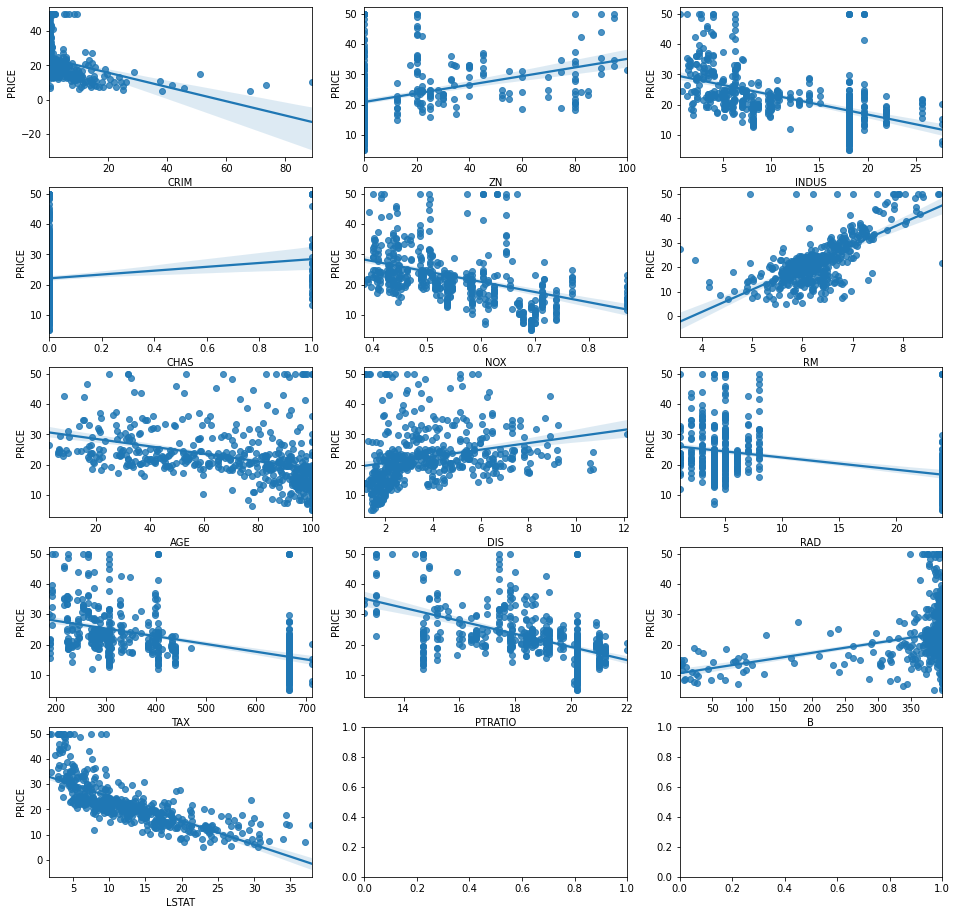

In [47]:
x_features = ['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
fig, axs = plt.subplots(figsize =(16, 16), ncols=3, nrows=5)
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    print(row, col)
    # regplot: 산점도와 선형 회귀 그래표 함께 그려줌
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])